<a href="https://colab.research.google.com/github/VasavSrivastava/MAT422/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2.3.1 Joint Probability Distributions**

#####**2.3.1.1 Two Discrete Random Variables**
Two discrete random variables describe the likelihood of different outcomes occurring together. Let $X$ and $Y$ be two discrete random variables. The joint probability distribution $P(X = x, Y = y)$ gives the probability that $X$ takes the value $x$ and $Y$ takes the value $y$ simultaneously. This can be represented by a joint probability mass function (PMF), $P(X = x, Y = y) = p(x, y)$, which satisfies $\sum_x \sum_y p(x, y) = 1$. The marginal probabilities can be found by summing over one variable: $P(X = x) = \sum_y P(X = x, Y = y)$ and $P(Y = y) = \sum_x P(X = x, Y = y)$.


In [1]:
import numpy as np

# Define the joint probability distribution (as a 2D NumPy array)
# Rows represent X and columns represent Y
joint_prob = np.array([[0.1, 0.2],
                       [0.3, 0.4]])

# Check if the sum of all probabilities is 1 (property of joint probability)
print("Sum of joint probabilities:", np.sum(joint_prob))

# Marginal probability P(X)
marginal_X = np.sum(joint_prob, axis=1)
print("Marginal Probability P(X):", marginal_X)

# Marginal probability P(Y)
marginal_Y = np.sum(joint_prob, axis=0)
print("Marginal Probability P(Y):", marginal_Y)

# Joint probability P(X=1, Y=1)
joint_X1_Y1 = joint_prob[1, 1]
print("Joint Probability P(X=1, Y=1):", joint_X1_Y1)


Sum of joint probabilities: 1.0
Marginal Probability P(X): [0.3 0.7]
Marginal Probability P(Y): [0.4 0.6]
Joint Probability P(X=1, Y=1): 0.4


#####**2.3.1.2 Two Continuous Random Variables**
Two continuous random variables describe the likelihood of different outcomes occurring together in a continuous sample space. Let $X$ and $Y$ be two continuous random variables. The joint probability distribution is represented by the joint probability density function (PDF) $f_{X,Y}(x, y)$, where $f_{X,Y}(x, y)$ gives the density of probability at the point $(x, y)$. The joint PDF satisfies the property:$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dx \, dy = 1.
$$ The marginal densities can be obtained by integrating the joint PDF over one variable: $$ f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dy \quad \text{and} \quad f_Y(y) = \int_{-\infty}^{\infty} f_{X,Y}(x, y) \, dx.$$ This describes how the probability is distributed across two continuous variables.



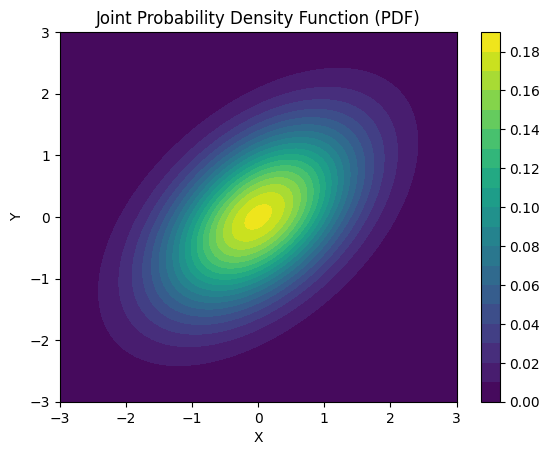

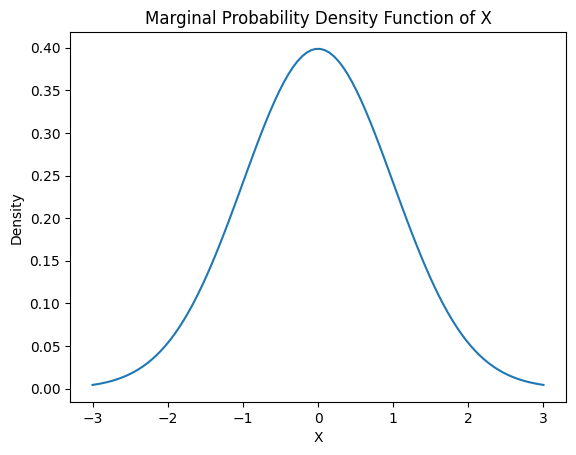

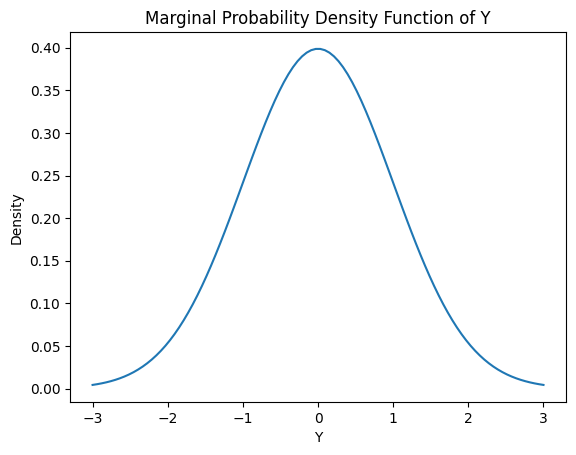

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance for the bivariate normal distribution
mean = [0, 0]  # Mean of X and Y
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix

# Create a grid of (x, y) values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the joint probability density function (PDF) for each (x, y) pair
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Plot the joint probability distribution as a contour plot
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.title("Joint Probability Density Function (PDF)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Marginal distribution of X (integrating over Y)
marginal_X = np.trapz(Z, y, axis=1)  # Numerical integration
plt.plot(x, marginal_X)
plt.title("Marginal Probability Density Function of X")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

# Marginal distribution of Y (integrating over X)
marginal_Y = np.trapz(Z, x, axis=0)  # Numerical integration
plt.plot(y, marginal_Y)
plt.title("Marginal Probability Density Function of Y")
plt.xlabel("Y")
plt.ylabel("Density")
plt.show()


#####**2.3.1.3 Independent Random Variables**
Independent random variables are random variables whose occurrence is not influenced by each other. For two random variables $X$ and $Y$, they are independent if the joint probability distribution is the product of their individual (marginal) distributions. This can be mathematically expressed as: $$ P(X = x, Y = y) = P(X = x) \cdot P(Y = y) \quad \text{for all} \, x \, \text{and} \, y.$$ In the continuous case, the joint probability density function (PDF) $f_{X,Y}(x, y)$ must satisfy: $$ f_{X,Y}(x, y) = f_X(x) \cdot f_Y(y),$$ where $f_X(x)$ and $f_Y(y)$ are the marginal PDFs of $X$ and $Y$, respectively. This implies that the joint distribution of independent random variables can be factored into the product of their individual distributions.


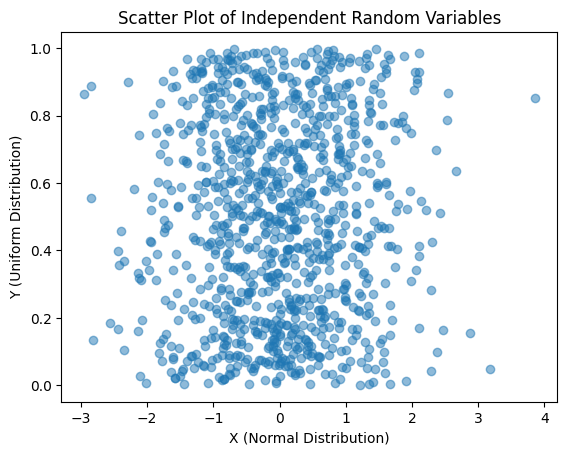

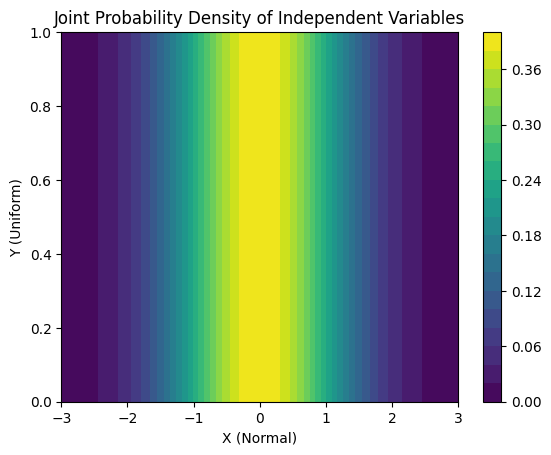

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Generate 1000 samples from two independent distributions
# X follows a normal distribution N(0, 1)
X = np.random.normal(0, 1, 1000)

# Y follows a uniform distribution U(0, 1)
Y = np.random.uniform(0, 1, 1000)

# Plot a scatter plot to visualize the independence
plt.scatter(X, Y, alpha=0.5)
plt.title('Scatter Plot of Independent Random Variables')
plt.xlabel('X (Normal Distribution)')
plt.ylabel('Y (Uniform Distribution)')
plt.show()

# Compute joint probability density (independent case: product of marginal densities)
# We'll evaluate the densities at specific points for visualization
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(0, 1, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# Marginal PDFs for X and Y
f_X = norm.pdf(X_grid)  # PDF of normal distribution
f_Y = uniform.pdf(Y_grid)  # PDF of uniform distribution

# Joint PDF for independent variables is the product of the marginals
joint_pdf = f_X * f_Y

# Plot the joint PDF
plt.contourf(X_grid, Y_grid, joint_pdf, levels=20, cmap='viridis')
plt.colorbar()
plt.title('Joint Probability Density of Independent Variables')
plt.xlabel('X (Normal)')
plt.ylabel('Y (Uniform)')
plt.show()

#**2.3.2 Correlation and Dependence**
#####**2.3.2.1 Correlation for Random Variables**
Correlation for random variables measures the strength and direction of the linear relationship between two random variables. The correlation between two random variables $X$ and $Y$ is given by the correlation coefficient, denoted as $\rho_{X,Y}$ (or sometimes $r$ for sample data). The correlation coefficient is defined as: $$ \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$ where $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively. The correlation coefficient $\rho_{X,Y}$ takes values in the range $[-1, 1]$, where $\rho_{X,Y} = 1$ indicates a perfect positive linear relationship, $\rho_{X,Y} = -1$ indicates a perfect negative linear relationship, and $\rho_{X,Y} = 0$ indicates no linear relationship. This correlation coefficient only represents linear dependence, meaning that non-linear relationships may not be reflected accurately by this.


Correlation Coefficient: 0.9707734092137419


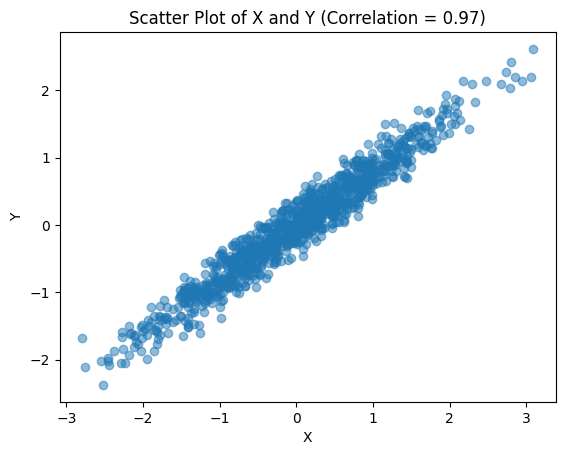

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Generate two random variables (X and Y)
# X is a normally distributed random variable
X = np.random.normal(0, 1, 1000)

# Y is another normally distributed random variable, correlated with X
# Let's make Y dependent on X with some noise added
Y = 0.8 * X + np.random.normal(0, 0.2, 1000)

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(X, Y)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Plot the relationship between X and Y
plt.scatter(X, Y, alpha=0.5)
plt.title(f'Scatter Plot of X and Y (Correlation = {correlation_coefficient:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#####**2.3.2.2 Correlation for Samples**
Correlation for samples measures the strength and direction of the linear relationship between two sets of sample data. The sample correlation coefficient, denoted as $r$, is used to quantify this relationship and is given by the formula: $$ r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} $$ where $x_i$ and $y_i$ are individual sample points from the two datasets, $\bar{x}$ and $\bar{y}$ are the sample means, and $n$ is the total number of samples. The sample correlation coefficient $r$ ranges from $-1$ to $1$, where $r = 1$ indicates perfect positive correlation, $r = -1$ indicates perfect negative correlation, and $r = 0$ indicates no linear relationship between the sample datasets.



Sample Correlation Coefficient: 0.7048878152931597


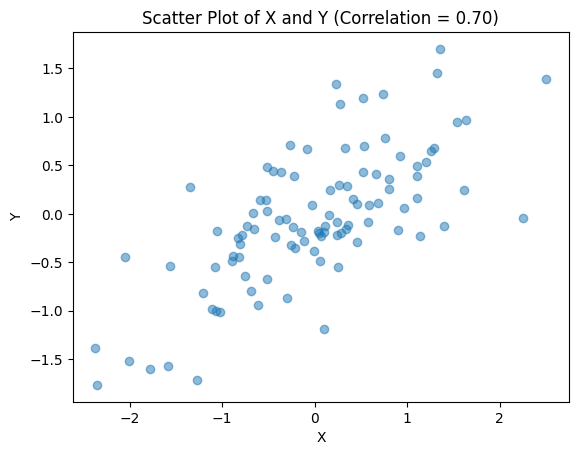

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Generate two sample datasets (X and Y)
# X: random data with a normal distribution
X = np.random.normal(0, 1, 100)

# Y: generated with some linear dependence on X plus noise
Y = 0.5 * X + np.random.normal(0, 0.5, 100)

# Calculate the sample correlation coefficient using the Pearson method
correlation_coefficient, _ = pearsonr(X, Y)
print(f"Sample Correlation Coefficient: {correlation_coefficient}")

# Plot the relationship between X and Y
plt.scatter(X, Y, alpha=0.5)
plt.title(f'Scatter Plot of X and Y (Correlation = {correlation_coefficient:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#**2.3.3 Random Samples**
#####**2.3.3.1 Random Samples**
A random sample refers to a subset of data drawn from a larger population where each element has an equal chance of being selected. In the context of probability and statistics, if $X_1, X_2, \dots, X_n$ are independent and identically distributed (i.i.d.) random variables from a population with probability distribution $f_X(x)$, then this set of random variables forms a random sample. The goal of using random samples is to make inferences about the entire population based on the sample data. Mathematically, a random sample can be expressed as: $$ X_1, X_2, \dots, X_n \sim f_X(x) $$ where $\sim$ means "distributed as" and $f_X(x)$ represents the probability distribution of the population. The sample mean $\bar{X}$ and sample variance $S^2$ can be used to estimate the population parameters: $$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i, \quad S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$




In [6]:
import numpy as np

# Generate a random sample of size n from a normal distribution N(0, 1)
n = 100  # Sample size
random_sample = np.random.normal(0, 1, n)

# Calculate the sample mean
sample_mean = np.mean(random_sample)

# Calculate the sample variance (ddof=1 to get the unbiased estimator, i.e., sample variance)
sample_variance = np.var(random_sample, ddof=1)

# Print the results
print(f"Random Sample: {random_sample[:10]} ...")  # Showing only the first 10 values for brevity
print(f"Sample Mean: {sample_mean}")
print(f"Sample Variance: {sample_variance}")


Random Sample: [ 0.05405184  0.7436587  -0.83116928  0.21268107  0.75037954 -0.54495552
 -0.37825601 -0.57083496 -0.01595944 -1.41016775] ...
Sample Mean: -0.1502843775352581
Sample Variance: 1.004585013877028


#####**2.3.3.2 The Central Limit Theorem**
The Central Limit Theorem (CLT) states that, for a sufficiently large sample size $n$, the distribution of the sample mean $\bar{X}$ of independent and identically distributed (i.i.d.) random variables approaches a normal distribution, regardless of the original distribution of the data. More formally, if $X_1, X_2, \dots, X_n$ are i.i.d. random variables with mean $\mu$ and variance $\sigma^2$, then the sample mean $\bar{X}$ is approximately normally distributed as: $$ \bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)$$ As $n \to \infty$, the sampling distribution of $\bar{X}$ converges to a normal distribution $N(\mu, \sigma^2/n)$, where $\mu$ is the population mean and $\sigma^2$ is the population variance. The CLT is fundamental because it allows for the use of normal distribution approximations for inference, even when the underlying population distribution is not normal, provided the sample size is large enough.


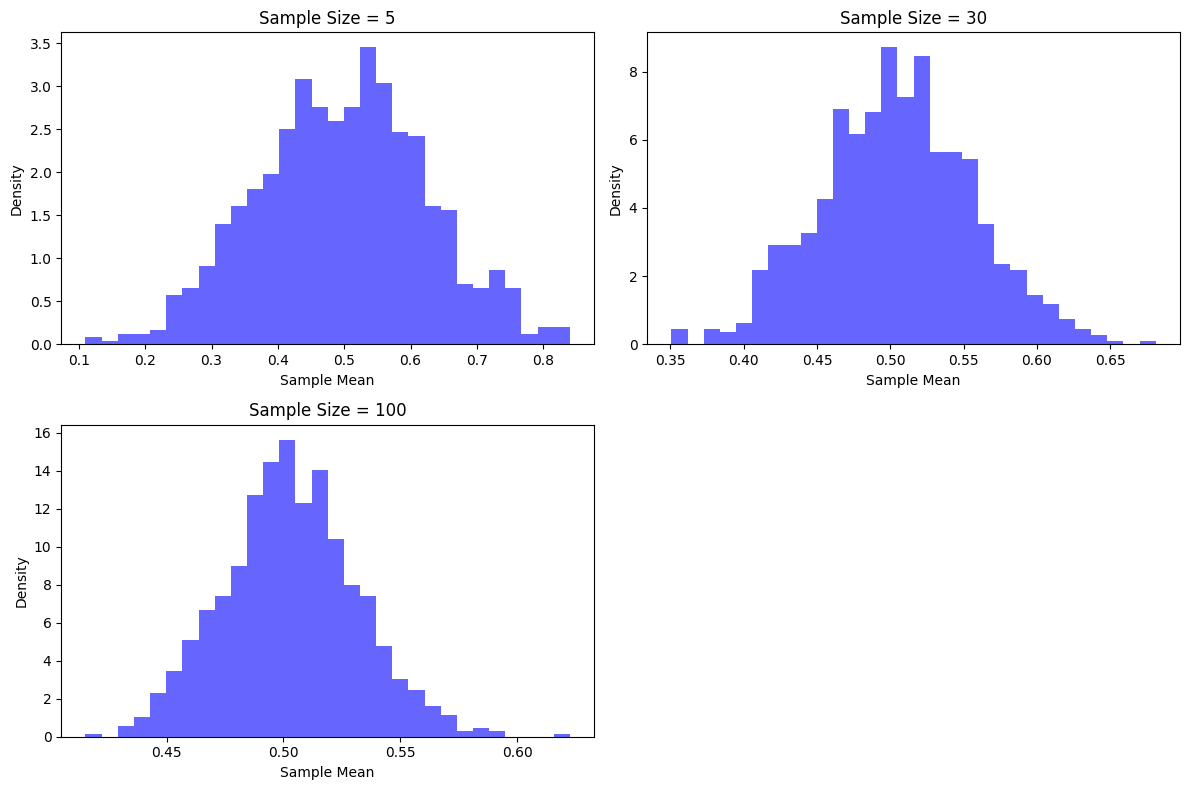

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 samples from a uniform distribution
population = np.random.uniform(0, 1, 10000)

# Function to compute sample means
def sample_means(sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Define sample sizes
sample_sizes = [5, 30, 100]

# Plot histograms of sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, size in enumerate(sample_sizes, 1):
    means = sample_means(size, 1000)  # Generate 1000 sample means
    plt.subplot(2, 2, i)
    plt.hist(means, bins=30, density=True, alpha=0.6, color='b')
    plt.title(f'Sample Size = {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()